# ML-Data-Cleaning-and-Feature-Selection

In [1]:
#importing librarires

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline

In [2]:
#import data from csv file

data = pd.read_csv("https://raw.githubusercontent.com/charmiparmar/DSEMT_Datasets/refs/heads/main/finalapi.csv")

In [3]:
#view imported dataset

data.head()

,AGENCY_ID,PRIMARY_AGENCY_ID,PROD_ABBR,PROD_LINE,STATE_ABBR,STAT_PROFILE_DATE_YEAR,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,...,PL_BOUND_CT_ELINKS,PL_QUO_CT_ELINKS,PL_BOUND_CT_PLRANK,PL_QUO_CT_PLRANK,PL_BOUND_CT_eQTte,PL_QUO_CT_eQTte,PL_BOUND_CT_APPLIED,PL_QUO_CT_APPLIED,PL_BOUND_CT_TRANSACTNOW,PL_QUO_CT_TRANSACTNOW
0,3,3,BOILERMACH,CL,IN,2005,0,0,0,40.0,...,0,0,0,103,50,288,0,0,0,0
1,3,3,BOILERMACH,CL,IN,2006,0,0,0,151.0,...,0,0,0,103,50,288,0,0,0,0
2,3,3,BOILERMACH,CL,IN,2007,0,0,0,40.0,...,0,0,0,103,50,288,0,0,0,0
3,3,3,BOILERMACH,CL,IN,2008,0,0,0,69.0,...,0,0,0,103,50,288,0,0,0,0
4,3,3,BOILERMACH,CL,IN,2009,0,0,0,28.0,...,0,0,0,103,50,288,0,0,0,0


In [4]:
#Checking if any missing values are present in the dataset
data.isnull().sum()

AGENCY_ID                    0
PRIMARY_AGENCY_ID            0
PROD_ABBR                    0
PROD_LINE                    0
STATE_ABBR                   0
STAT_PROFILE_DATE_YEAR       0
RETENTION_POLY_QTY           0
POLY_INFORCE_QTY             0
PREV_POLY_INFORCE_QTY        0
NB_WRTN_PREM_AMT             0
WRTN_PREM_AMT                0
PREV_WRTN_PREM_AMT           0
PRD_ERND_PREM_AMT            0
PRD_INCRD_LOSSES_AMT         0
MONTHS                       0
RETENTION_RATIO              0
LOSS_RATIO                   0
LOSS_RATIO_3YR               0
GROWTH_RATE_3YR              0
AGENCY_APPOINTMENT_YEAR      0
ACTIVE_PRODUCERS             0
MAX_AGE                      0
MIN_AGE                      0
VENDOR_IND                   0
VENDOR                       0
PL_START_YEAR                0
PL_END_YEAR                  0
COMMISIONS_START_YEAR        0
COMMISIONS_END_YEAR          0
CL_START_YEAR                0
CL_END_YEAR                  0
ACTIVITY_NOTES_START_YEAR    0
ACTIVITY

In [5]:
#To find the count and datatype of each column present in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213328 entries, 0 to 213327
Data columns (total 49 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   AGENCY_ID                  213328 non-null  int64  
 1   PRIMARY_AGENCY_ID          213328 non-null  int64  
 2   PROD_ABBR                  213328 non-null  object 
 3   PROD_LINE                  213328 non-null  object 
 4   STATE_ABBR                 213328 non-null  object 
 5   STAT_PROFILE_DATE_YEAR     213328 non-null  int64  
 6   RETENTION_POLY_QTY         213328 non-null  int64  
 7   POLY_INFORCE_QTY           213328 non-null  int64  
 8   PREV_POLY_INFORCE_QTY      213328 non-null  int64  
 9   NB_WRTN_PREM_AMT           213328 non-null  float64
 10  WRTN_PREM_AMT              213328 non-null  float64
 11  PREV_WRTN_PREM_AMT         213328 non-null  float64
 12  PRD_ERND_PREM_AMT          213328 non-null  float64
 13  PRD_INCRD_LOSSES_AMT       21

In [6]:
#To get the distribution statistics of numeric data present in dataset
data.describe()

,AGENCY_ID,PRIMARY_AGENCY_ID,STAT_PROFILE_DATE_YEAR,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,PRD_ERND_PREM_AMT,...,PL_BOUND_CT_ELINKS,PL_QUO_CT_ELINKS,PL_BOUND_CT_PLRANK,PL_QUO_CT_PLRANK,PL_BOUND_CT_eQTte,PL_QUO_CT_eQTte,PL_BOUND_CT_APPLIED,PL_QUO_CT_APPLIED,PL_BOUND_CT_TRANSACTNOW,PL_QUO_CT_TRANSACTNOW
count,213328.000000,213328.000000,213328.000000,213328.000000,213328.000000,213328.000000,213328.000000,2.133280e+05,2.133280e+05,2.133280e+05,...,213328.000000,213328.000000,213328.000000,213328.000000,213328.000000,213328.000000,213328.000000,213328.000000,213328.000000,213328.000000
mean,4978.964158,21840.982206,2010.191738,158.634525,175.616919,6694.153369,2243.651368,1.963268e+04,2.600812e+04,1.945872e+04,...,26928.162206,26969.472127,26931.800401,27039.756497,26963.478081,27091.403323,26928.081002,26933.596284,26927.300134,26927.453377
std,2928.027642,36410.355440,3.129108,718.766295,774.640860,24639.586044,9976.801667,6.644395e+04,7.008093e+04,6.635115e+04,...,44357.460628,44333.186665,44355.256891,44291.273197,44336.059501,44258.970692,44357.509786,44354.180214,44357.983442,44357.890447
min,3.000000,3.000000,2005.000000,0.000000,0.000000,0.000000,0.000000,-2.027776e+05,-1.861810e+05,-1.643490e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2366.000000,2788.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,2.027500e+00,1.480000e+02,7.600000e+01,...,0.000000,0.000000,0.000000,0.000000,11.000000,66.000000,0.000000,0.000000,0.000000,0.000000
50%,4976.000000,6110.000000,2010.000000,0.000000,0.000000,0.000000,0.000000,1.143620e+03,1.781000e+03,1.180490e+03,...,0.000000,0.000000,0.000000,0.000000,51.000000,258.000000,0.000000,0.000000,0.000000,0.000000
75%,7589.000000,9285.000000,2013.000000,24.000000,30.000000,72.000000,485.000000,8.358695e+03,1.477315e+04,8.231562e+03,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
max,9998.000000,99999.000000,2015.000000,21979.000000,22968.000000,99999.000000,556930.220000,1.715742e+06,1.904570e+06,1.780498e+06,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000


<Figure size 576x360 with 0 Axes>

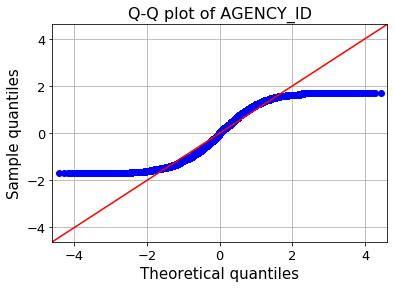

<Figure size 576x360 with 0 Axes>

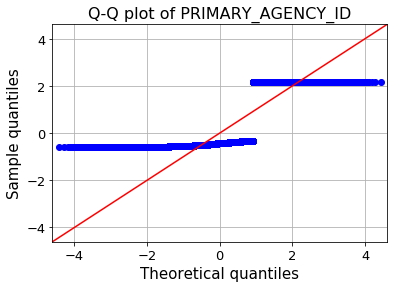

<Figure size 576x360 with 0 Axes>

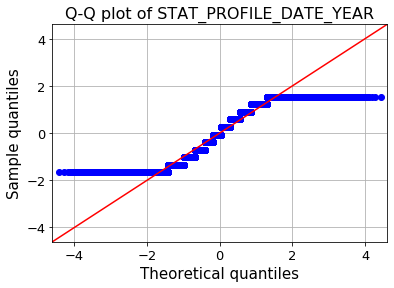

<Figure size 576x360 with 0 Axes>

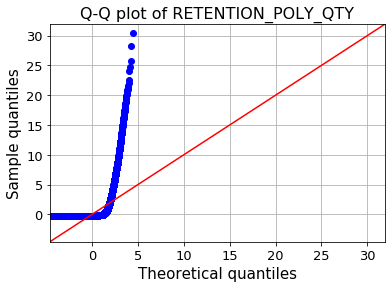

<Figure size 576x360 with 0 Axes>

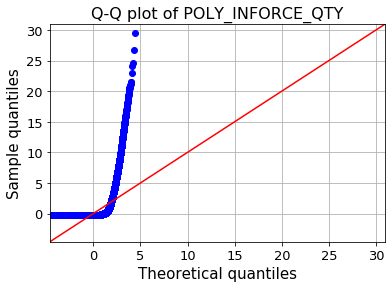

<Figure size 576x360 with 0 Axes>

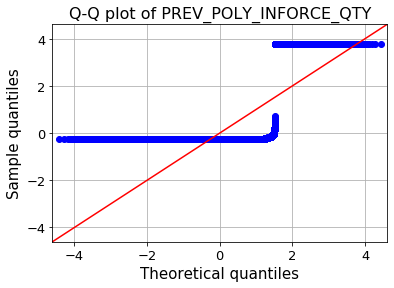

<Figure size 576x360 with 0 Axes>

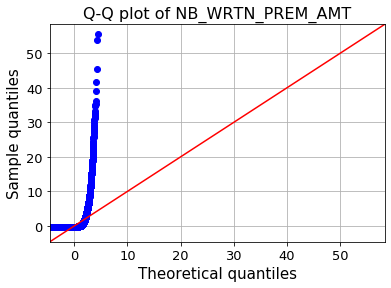

<Figure size 576x360 with 0 Axes>

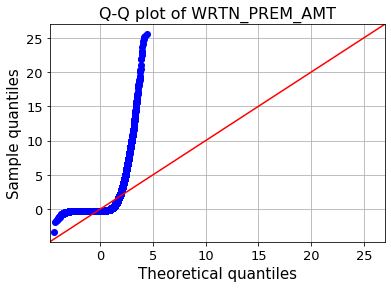

<Figure size 576x360 with 0 Axes>

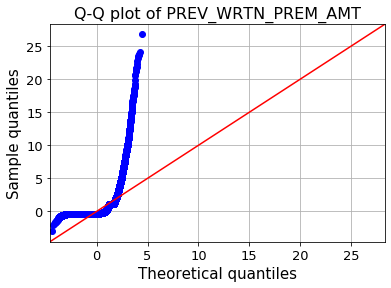

<Figure size 576x360 with 0 Axes>

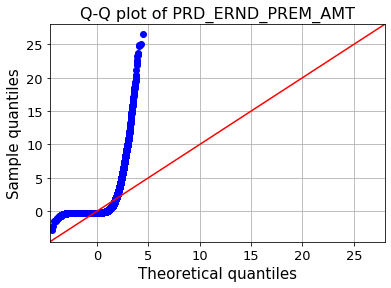

<Figure size 576x360 with 0 Axes>

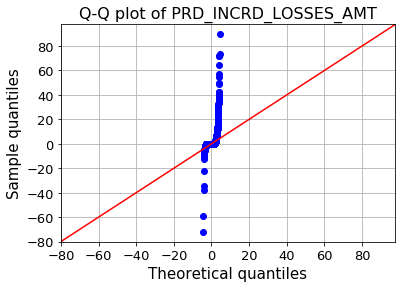

<Figure size 576x360 with 0 Axes>

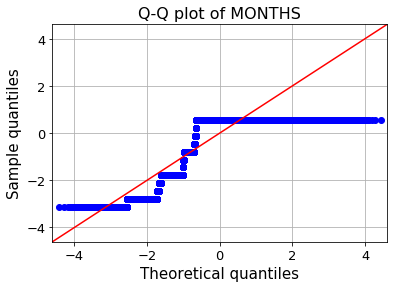

<Figure size 576x360 with 0 Axes>

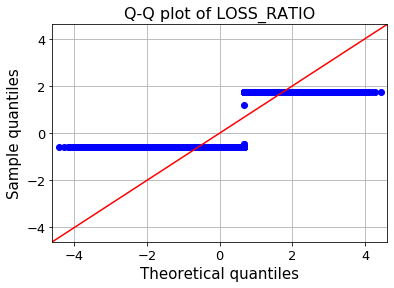

<Figure size 576x360 with 0 Axes>

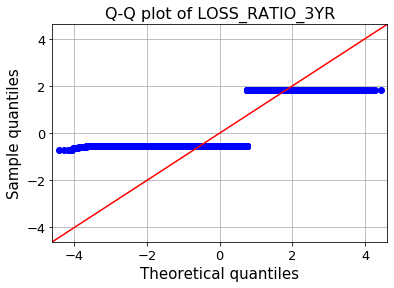

<Figure size 576x360 with 0 Axes>

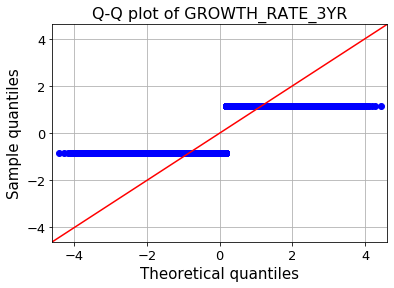

<Figure size 576x360 with 0 Axes>

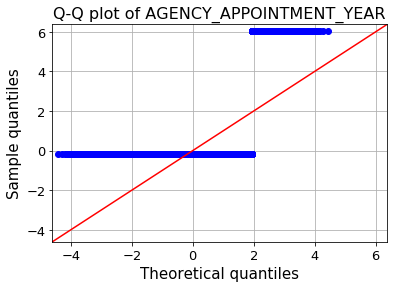

<Figure size 576x360 with 0 Axes>

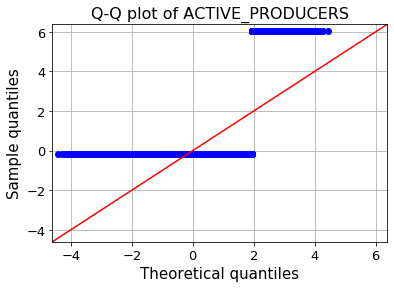

<Figure size 576x360 with 0 Axes>

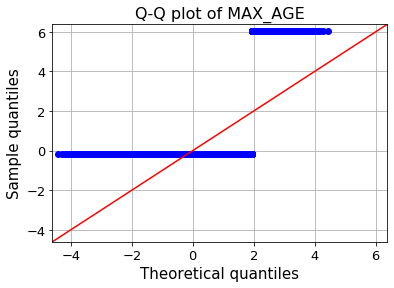

<Figure size 576x360 with 0 Axes>

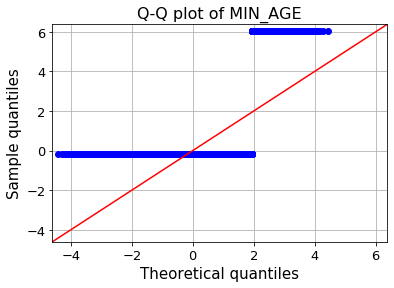

<Figure size 576x360 with 0 Axes>

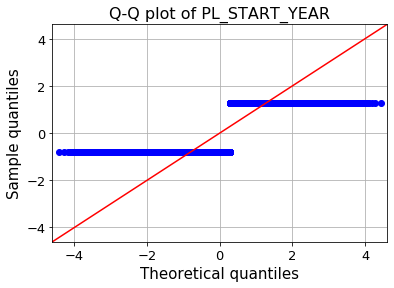

<Figure size 576x360 with 0 Axes>

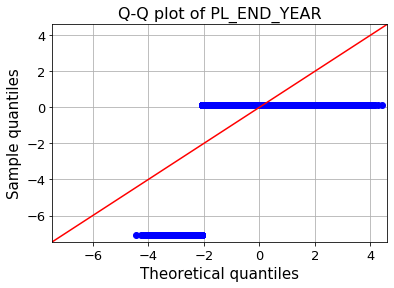

<Figure size 576x360 with 0 Axes>

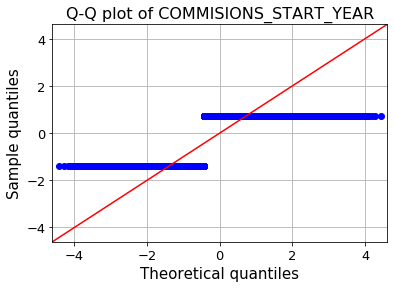

<Figure size 576x360 with 0 Axes>

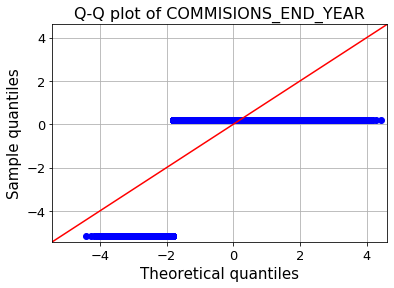

<Figure size 576x360 with 0 Axes>

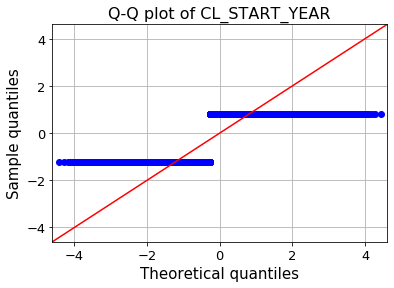

<Figure size 576x360 with 0 Axes>

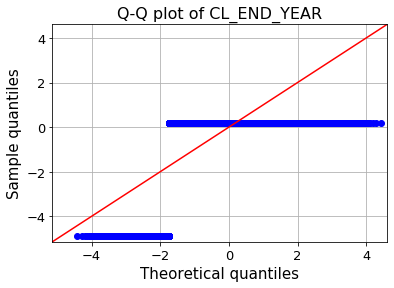

<Figure size 576x360 with 0 Axes>

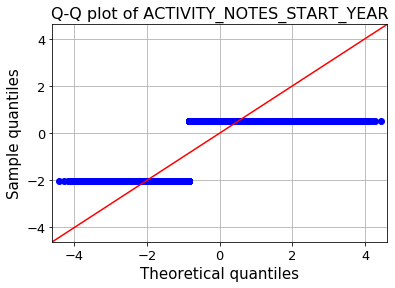

<Figure size 576x360 with 0 Axes>

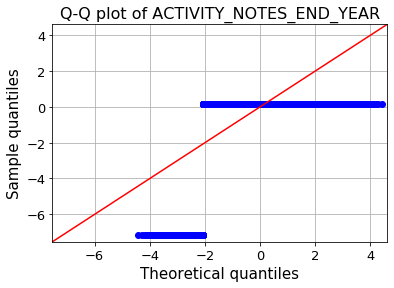

<Figure size 576x360 with 0 Axes>

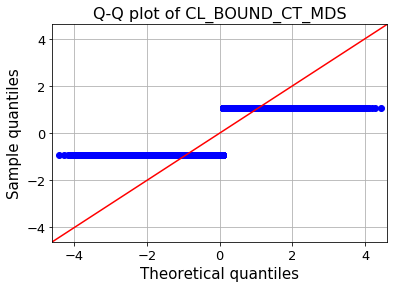

<Figure size 576x360 with 0 Axes>

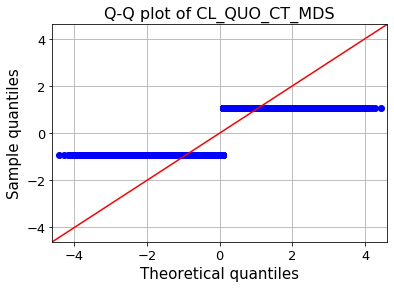

<Figure size 576x360 with 0 Axes>

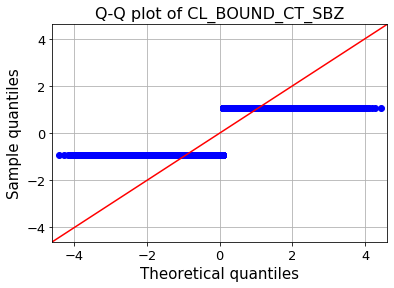

<Figure size 576x360 with 0 Axes>

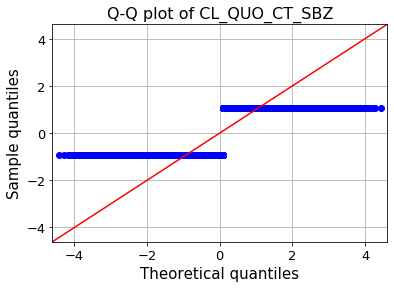

<Figure size 576x360 with 0 Axes>

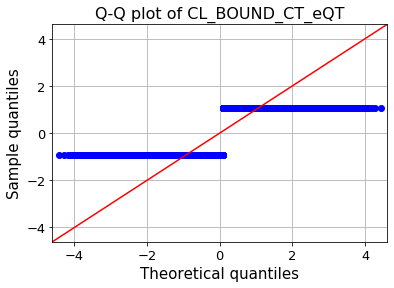

<Figure size 576x360 with 0 Axes>

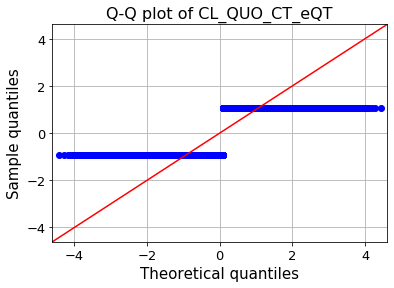

<Figure size 576x360 with 0 Axes>

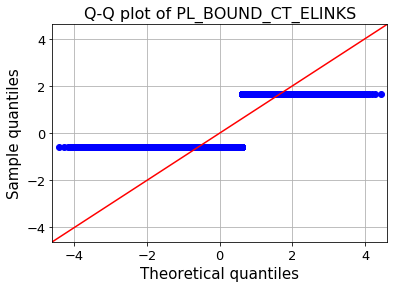

<Figure size 576x360 with 0 Axes>

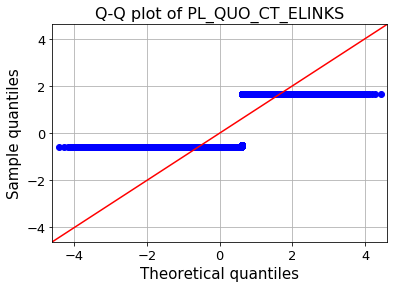

<Figure size 576x360 with 0 Axes>

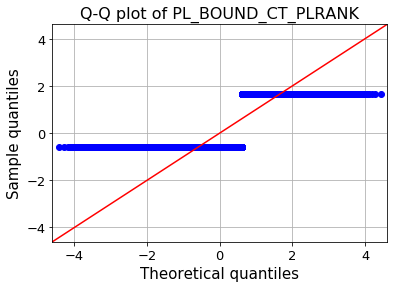

<Figure size 576x360 with 0 Axes>

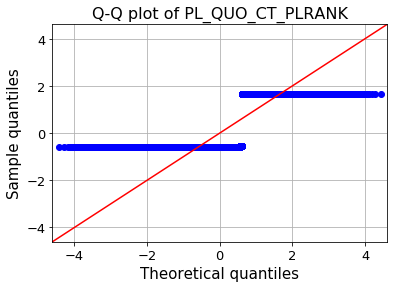

<Figure size 576x360 with 0 Axes>

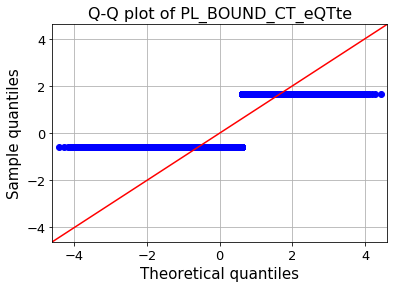

<Figure size 576x360 with 0 Axes>

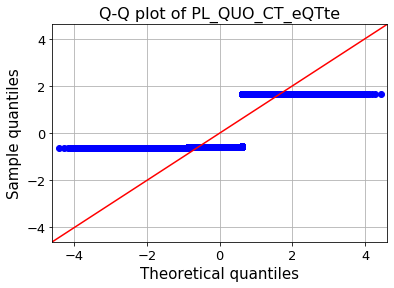

<Figure size 576x360 with 0 Axes>

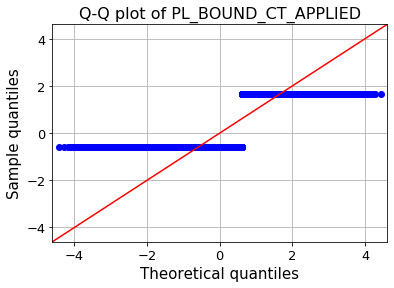

<Figure size 576x360 with 0 Axes>

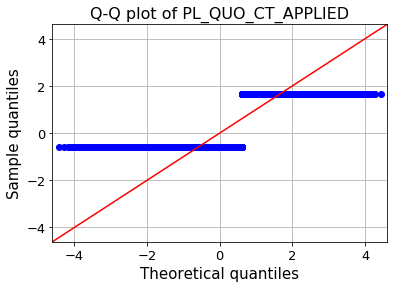

<Figure size 576x360 with 0 Axes>

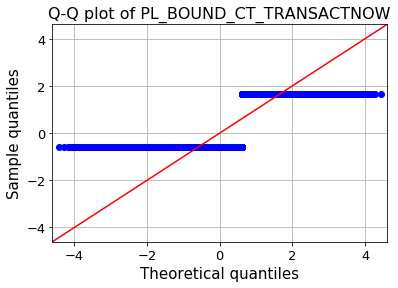

<Figure size 576x360 with 0 Axes>

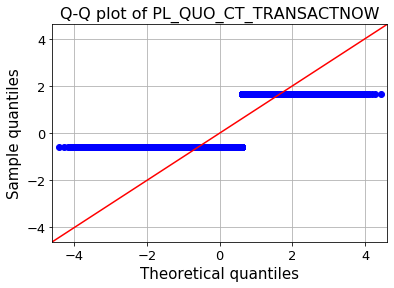

In [7]:
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['AGENCY_ID',                    
'PRIMARY_AGENCY_ID',            
'STAT_PROFILE_DATE_YEAR',       
'RETENTION_POLY_QTY',      
'POLY_INFORCE_QTY',             
'PREV_POLY_INFORCE_QTY',      
'NB_WRTN_PREM_AMT',           
'WRTN_PREM_AMT',            
'PREV_WRTN_PREM_AMT',          
'PRD_ERND_PREM_AMT',            
'PRD_INCRD_LOSSES_AMT',         
'MONTHS',            
'LOSS_RATIO',                   
'LOSS_RATIO_3YR',              
'GROWTH_RATE_3YR',              
'AGENCY_APPOINTMENT_YEAR',     
'ACTIVE_PRODUCERS',            
'MAX_AGE',                      
'MIN_AGE',                      
'PL_START_YEAR',               
'PL_END_YEAR',                 
'COMMISIONS_START_YEAR',      
'COMMISIONS_END_YEAR',       
'CL_START_YEAR',              
'CL_END_YEAR',                  
'ACTIVITY_NOTES_START_YEAR',  
'ACTIVITY_NOTES_END_YEAR',    
'CL_BOUND_CT_MDS',              
'CL_QUO_CT_MDS',                
'CL_BOUND_CT_SBZ',            
'CL_QUO_CT_SBZ',             
'CL_BOUND_CT_eQT',              
'CL_QUO_CT_eQT',                
'PL_BOUND_CT_ELINKS',           
'PL_QUO_CT_ELINKS',             
'PL_BOUND_CT_PLRANK',           
'PL_QUO_CT_PLRANK',             
'PL_BOUND_CT_eQTte',            
'PL_QUO_CT_eQTte',           
'PL_BOUND_CT_APPLIED',          
'PL_QUO_CT_APPLIED',         
'PL_BOUND_CT_TRANSACTNOW',      
'PL_QUO_CT_TRANSACTNOW'  ]]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

In [8]:
#Set the target variable (depedent) and X (independent variables)
target = 'RETENTION_RATIO'

#Sampling data to reduce the number of rows for faster processing (~200k rows to )
df = data.sample(frac=0.1, replace=True, random_state=1)
X = df[df.columns[df.columns != target]]
y = df[target]

In [9]:
X

,AGENCY_ID,PRIMARY_AGENCY_ID,PROD_ABBR,PROD_LINE,STATE_ABBR,STAT_PROFILE_DATE_YEAR,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,...,PL_BOUND_CT_ELINKS,PL_QUO_CT_ELINKS,PL_BOUND_CT_PLRANK,PL_QUO_CT_PLRANK,PL_BOUND_CT_eQTte,PL_QUO_CT_eQTte,PL_BOUND_CT_APPLIED,PL_QUO_CT_APPLIED,PL_BOUND_CT_TRANSACTNOW,PL_QUO_CT_TRANSACTNOW
128037,5993,5993,BOP,CL,OH,2009,0,0,0,0.0,...,0,0,0,0,395,1351,0,0,0,0
208780,9727,9727,MOTORHOM12,PL,OH,2014,32,52,57,221.5,...,0,0,0,0,263,876,0,0,0,0
5192,263,99999,GENERALIAB,CL,WV,2013,0,0,0,0.0,...,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999
50057,2252,2252,COMMINLMAR,CL,OH,2013,0,0,0,0.0,...,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999
109259,5120,9502,COMMPOL,CL,KY,2010,36,36,36,0.0,...,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106184,4958,4958,HOMEOWNERS,PL,WV,2008,2328,2463,2659,6007.0,...,0,0,0,0,9,66,0,0,0,0
135379,6355,8003,WORKCOMP,CL,KY,2011,0,0,0,0.0,...,0,0,0,0,0,2,0,0,0,0
187046,8831,8497,CYCLES,PL,OH,2010,36,36,36,0.0,...,0,0,0,0,4,4,0,0,0,0
8687,470,470,DTALK,PL,IN,2015,23,23,25,0.0,...,0,0,0,0,83,506,0,0,0,0


In [10]:
y

128037    99999.000000
208780        0.561404
5192      99999.000000
50057     99999.000000
109259        1.000000
              ...     
106184        0.875517
135379    99999.000000
187046        1.000000
8687          0.920000
64384         0.000000
Name: RETENTION_RATIO, Length: 21333, dtype: float64

In [11]:
#Converting retention ratio into ranges for better visualisation of outcome
df.loc[df['RETENTION_RATIO'] == 99999.000000, 'RETENTION_RATIO'] = 0
df.loc[df['RETENTION_RATIO'] > 0.7, 'RETENTION_RATIO'] = 3
df.loc[(df['RETENTION_RATIO'] < 0.7) & (df['RETENTION_RATIO'] > 0.3) , 'RETENTION_RATIO'] = 2
df.loc[df['RETENTION_RATIO'] < 0.3, 'RETENTION_RATIO'] = 1

df.RETENTION_RATIO.head()

128037    1.0
208780    2.0
5192      1.0
50057     1.0
109259    3.0
Name: RETENTION_RATIO, dtype: float64

In [12]:
#Converting float64 to int64 to apply Filter methods
df['RETENTION_RATIO'] = df['RETENTION_RATIO'].astype(np.int64)
display(df.RETENTION_RATIO.dtypes)
y = df[target]

dtype('int64')

In [13]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [14]:
#Encoding categorical values prior to feature selection
import category_encoders as ce

encoder = ce.LeaveOneOutEncoder(return_df=True)
X = encoder.fit_transform(X, y)

In [15]:
X.head()

,AGENCY_ID,PRIMARY_AGENCY_ID,PROD_ABBR,PROD_LINE,STATE_ABBR,STAT_PROFILE_DATE_YEAR,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,...,PL_BOUND_CT_ELINKS,PL_QUO_CT_ELINKS,PL_BOUND_CT_PLRANK,PL_QUO_CT_PLRANK,PL_BOUND_CT_eQTte,PL_QUO_CT_eQTte,PL_BOUND_CT_APPLIED,PL_QUO_CT_APPLIED,PL_BOUND_CT_TRANSACTNOW,PL_QUO_CT_TRANSACTNOW
128037,5993,5993,1.000000,1.161407,1.783273,2009,0,0,0,0.0,...,0,0,0,0,395,1351,0,0,0,0
208780,9727,9727,2.071823,2.349871,1.783175,2014,32,52,57,221.5,...,0,0,0,0,263,876,0,0,0,0
5192,263,99999,1.000000,1.161407,1.614923,2013,0,0,0,0.0,...,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999
50057,2252,2252,1.000000,1.161407,1.783273,2013,0,0,0,0.0,...,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999
109259,5120,9502,2.563622,1.161246,1.554105,2010,36,36,36,0.0,...,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999


In [16]:
pip install skfeature-chappers

Note: you may need to restart the kernel to use updated packages.


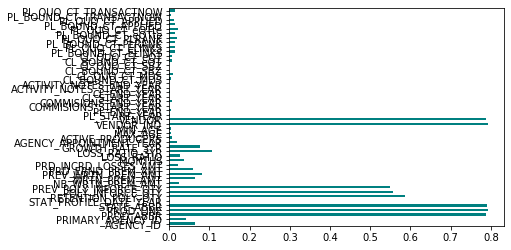

<Figure size 1440x504 with 0 Axes>

In [17]:
#feature selection to find the best set of features
#1. Filter method: Information Gain
from sklearn.feature_selection import chi2, SelectKBest, SelectPercentile, mutual_info_classif
from skfeature.function.similarity_based import fisher_score

#Select top 20 related features
selector = SelectKBest(mutual_info_classif, k=20)
X_reduced = selector.fit_transform(X, y)
X_reduced.shape

importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances, data.columns[data.columns != 'RETENTION_RATIO'])
feat_importances.plot(kind='barh', color='teal')
plt.figure(figsize=(20,7))
plt.show()

#ranks = fisher_score.fisher_score(X,y)
#feat_importances.plot(kind='barh', color='teal')
#plot.show

In [18]:
X_reduced.shape

(21333, 20)

In [19]:

cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns


['AGENCY_ID',
 'PRIMARY_AGENCY_ID',
 'PROD_ABBR',
 'PROD_LINE',
 'STATE_ABBR',
 'RETENTION_POLY_QTY',
 'POLY_INFORCE_QTY',
 'PREV_POLY_INFORCE_QTY',
 'WRTN_PREM_AMT',
 'PREV_WRTN_PREM_AMT',
 'PRD_ERND_PREM_AMT',
 'MONTHS',
 'LOSS_RATIO',
 'LOSS_RATIO_3YR',
 'GROWTH_RATE_3YR',
 'VENDOR_IND',
 'VENDOR',
 'PL_QUO_CT_PLRANK',
 'PL_BOUND_CT_eQTte',
 'PL_QUO_CT_eQTte']

In [20]:
#Second method to select best features

#ranks = fisher_score.fisher_score(X,y)
#feat_importances = pd.Series(ranks, data.columns[data.columns != 'RETENTION_RATIO'])
#feat_importances.plot(kind='barh', color='teal')
#plt.show

In [21]:
df_new = df[['AGENCY_ID',
 'PRIMARY_AGENCY_ID',
 'PROD_ABBR',
 'PROD_LINE',
 'STATE_ABBR',
 'RETENTION_POLY_QTY',
 'POLY_INFORCE_QTY',
 'PREV_POLY_INFORCE_QTY',
 'WRTN_PREM_AMT',
 'PREV_WRTN_PREM_AMT',
 'PRD_ERND_PREM_AMT',
 'MONTHS',
 'LOSS_RATIO_3YR',
 'GROWTH_RATE_3YR',
 'VENDOR_IND',
 'VENDOR',
 'PL_QUO_CT_ELINKS',
 'PL_BOUND_CT_PLRANK',
 'PL_BOUND_CT_eQTte',
 'PL_QUO_CT_eQTte',
 'RETENTION_RATIO']]

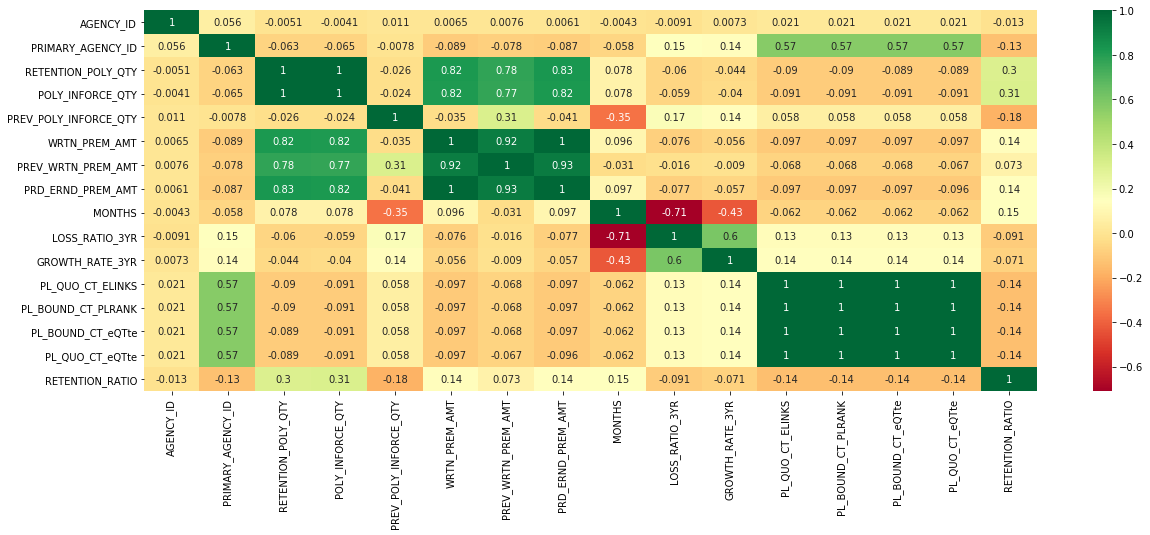

In [22]:
plt.figure(figsize=(20,7))
sns.heatmap(df_new.corr(), annot=True, cmap='RdYlGn')

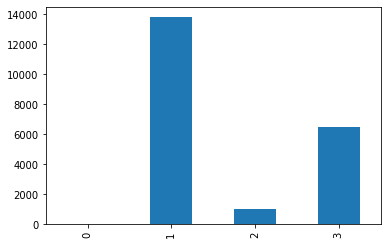

In [23]:
labels = ['NA', 'LOW', 'AVG', 'HIGH']
df_new["RETENTION_RATIO"].value_counts().sort_index().plot.bar()

In [24]:
df_new = df_new[~df_new.index.duplicated()]

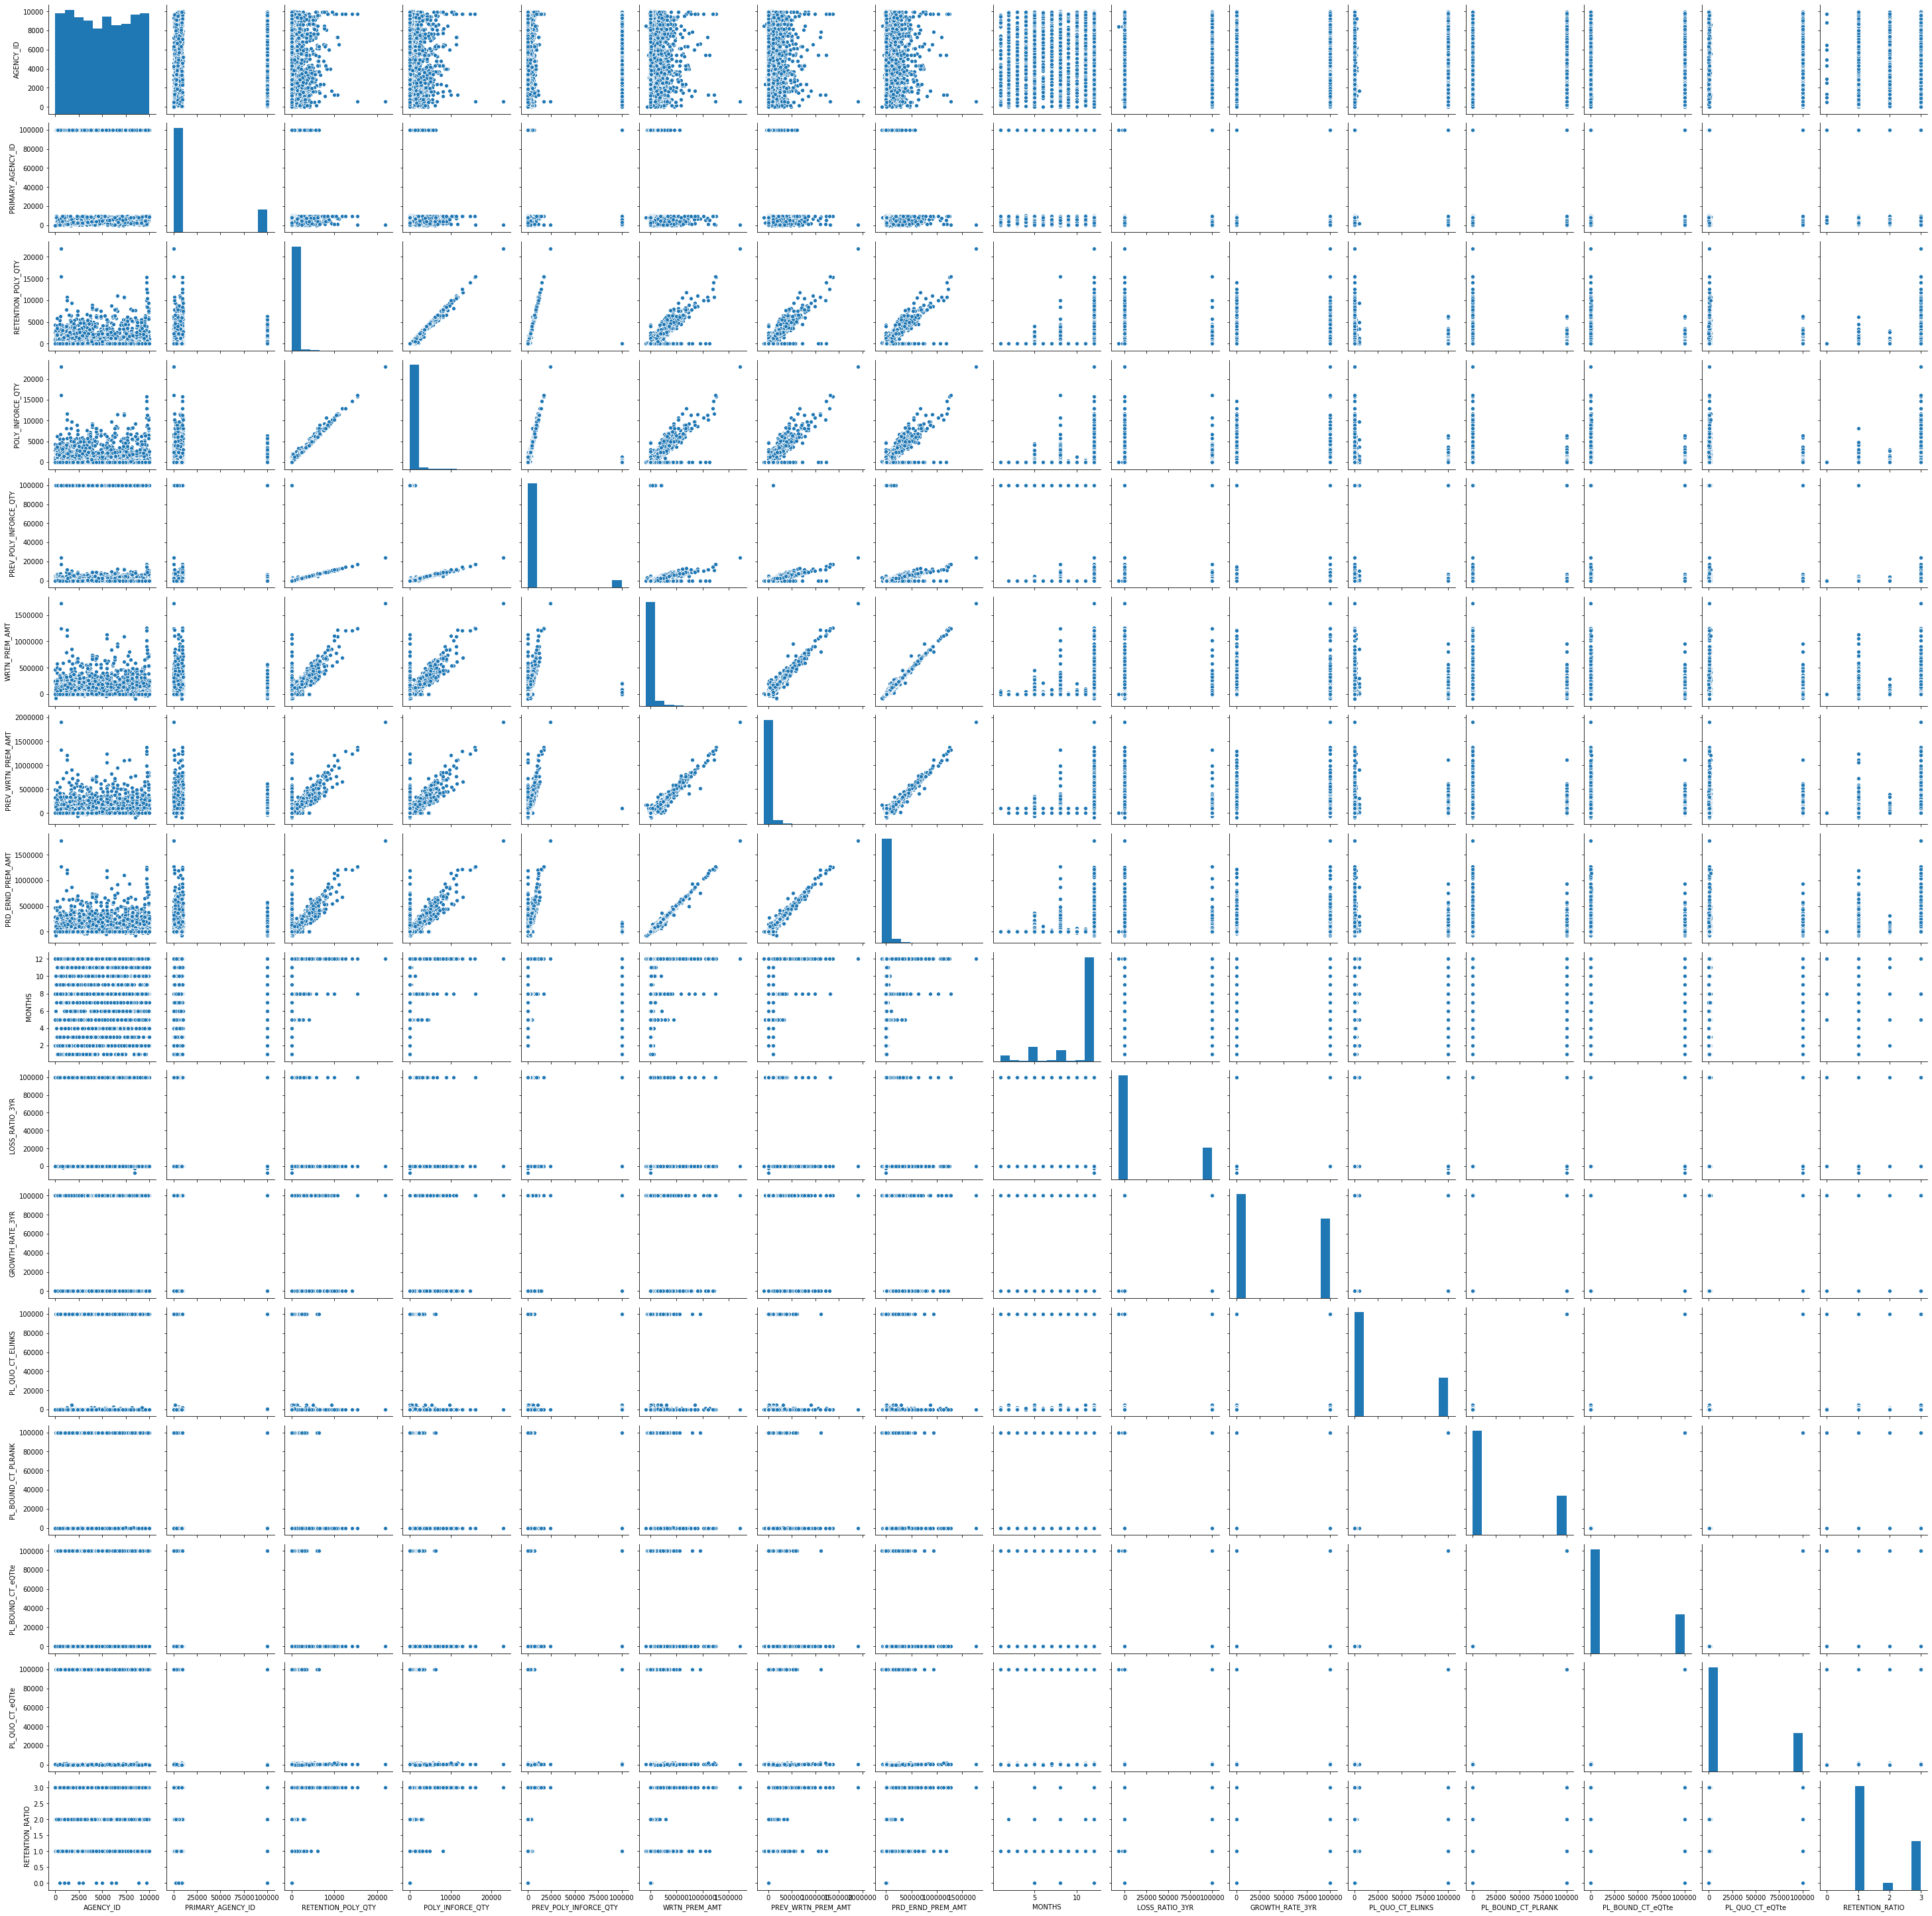

In [25]:
sns.pairplot(df_new) 

In [26]:
df_new

,AGENCY_ID,PRIMARY_AGENCY_ID,PROD_ABBR,PROD_LINE,STATE_ABBR,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,...,MONTHS,LOSS_RATIO_3YR,GROWTH_RATE_3YR,VENDOR_IND,VENDOR,PL_QUO_CT_ELINKS,PL_BOUND_CT_PLRANK,PL_BOUND_CT_eQTte,PL_QUO_CT_eQTte,RETENTION_RATIO
128037,5993,5993,BOP,CL,OH,0,0,0,3802.53,10121.54,...,12,0.433048,-0.062610,Y,D,0,0,395,1351,1
208780,9727,9727,MOTORHOM12,PL,OH,32,52,57,520.50,363.67,...,12,0.541412,0.093541,N,Unknown,0,0,263,876,2
5192,263,99999,GENERALIAB,CL,WV,0,0,0,0.00,2522.68,...,12,1.183928,-1.000000,N,Unknown,99999,99999,99999,99999,1
50057,2252,2252,COMMINLMAR,CL,OH,0,0,0,16979.62,41714.90,...,12,0.774329,-0.134539,N,Unknown,99999,99999,99999,99999,1
109259,5120,9502,COMMPOL,CL,KY,36,36,36,0.00,0.00,...,12,0.404594,0.157544,N,Unknown,99999,99999,99999,99999,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106184,4958,4958,HOMEOWNERS,PL,WV,2328,2463,2659,185869.72,185472.43,...,12,0.379350,-0.009424,Y,A,0,0,9,66,3
135379,6355,8003,WORKCOMP,CL,KY,0,0,0,6420.00,7233.00,...,12,0.165236,-0.079976,Y,E,0,0,0,2,1
187046,8831,8497,CYCLES,PL,OH,36,36,36,2018.35,1799.67,...,12,0.554469,-0.094649,Y,E,0,0,4,4,3
8687,470,470,DTALK,PL,IN,23,23,25,323.77,456.60,...,5,99999.000000,99999.000000,Y,E,0,0,83,506,3


In [27]:
target = 'RETENTION_RATIO'
X_new = df_new[df_new.columns[df_new.columns != target]]
y_new = df_new[target]

In [28]:
X_new

,AGENCY_ID,PRIMARY_AGENCY_ID,PROD_ABBR,PROD_LINE,STATE_ABBR,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,PRD_ERND_PREM_AMT,MONTHS,LOSS_RATIO_3YR,GROWTH_RATE_3YR,VENDOR_IND,VENDOR,PL_QUO_CT_ELINKS,PL_BOUND_CT_PLRANK,PL_BOUND_CT_eQTte,PL_QUO_CT_eQTte
128037,5993,5993,BOP,CL,OH,0,0,0,3802.53,10121.54,6731.09,12,0.433048,-0.062610,Y,D,0,0,395,1351
208780,9727,9727,MOTORHOM12,PL,OH,32,52,57,520.50,363.67,376.07,12,0.541412,0.093541,N,Unknown,0,0,263,876
5192,263,99999,GENERALIAB,CL,WV,0,0,0,0.00,2522.68,0.00,12,1.183928,-1.000000,N,Unknown,99999,99999,99999,99999
50057,2252,2252,COMMINLMAR,CL,OH,0,0,0,16979.62,41714.90,24419.78,12,0.774329,-0.134539,N,Unknown,99999,99999,99999,99999
109259,5120,9502,COMMPOL,CL,KY,36,36,36,0.00,0.00,0.00,12,0.404594,0.157544,N,Unknown,99999,99999,99999,99999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106184,4958,4958,HOMEOWNERS,PL,WV,2328,2463,2659,185869.72,185472.43,186831.39,12,0.379350,-0.009424,Y,A,0,0,9,66
135379,6355,8003,WORKCOMP,CL,KY,0,0,0,6420.00,7233.00,6469.95,12,0.165236,-0.079976,Y,E,0,0,0,2
187046,8831,8497,CYCLES,PL,OH,36,36,36,2018.35,1799.67,1971.16,12,0.554469,-0.094649,Y,E,0,0,4,4
8687,470,470,DTALK,PL,IN,23,23,25,323.77,456.60,214.47,5,99999.000000,99999.000000,Y,E,0,0,83,506


In [29]:
y_new

128037    1
208780    2
5192      1
50057     1
109259    3
         ..
106184    3
135379    1
187046    3
8687      3
64384     1
Name: RETENTION_RATIO, Length: 20315, dtype: int64

In [30]:
#Encoding categorical values prior to feature selection
import category_encoders as ce

encoder = ce.LeaveOneOutEncoder(return_df=True)
X_new = encoder.fit_transform(X_new, y_new)

In [31]:
from sklearn.model_selection import train_test_split

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13611, 20) (6704, 20) (13611,) (6704,)


In [32]:
# fit the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [33]:
# make predictions
y_pred = model.predict(X_test)
y_pred

array([1., 3., 1., ..., 3., 1., 1.])

In [34]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9997717557813129

In [35]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000)
classifier.fit(X_train,y_train)  

C:\Users\dkpar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
y_test_pred=classifier.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix,mean_squared_error
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

[[   0    1    0    1]
 [   2 4312    8   60]
 [   0  150    1  163]
 [   0  425    1 1580]]
Mean Squared Error: 0.33920047732696895


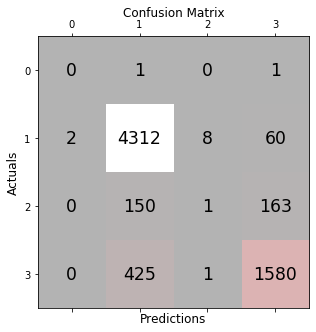

In [38]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.gist_heat, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#y_test and y_pred are the true labels and predicted labels respectively

acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred,average='micro')
recall = recall_score(y_test, y_test_pred,average='micro')
f1 = f1_score(y_test, y_test_pred,average='micro')

print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", recall)
print("F1: ",f1)

Accuracy:  0.8790274463007159
Precision:  0.8790274463007159
Recall:  0.8790274463007159
F1:  0.8790274463007159


In [40]:
#Imputation

df_cp = df_new.copy()
df_cp['RETENTION_POLY_QTY_1_percent'] = df_cp[['RETENTION_POLY_QTY']]
df_cp['RETENTION_POLY_QTY_5_percent'] = df_cp[['RETENTION_POLY_QTY']]
df_cp['RETENTION_POLY_QTY_10_percent'] =df_cp[['RETENTION_POLY_QTY']]
df_cp.head()

,AGENCY_ID,PRIMARY_AGENCY_ID,PROD_ABBR,PROD_LINE,STATE_ABBR,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,...,VENDOR_IND,VENDOR,PL_QUO_CT_ELINKS,PL_BOUND_CT_PLRANK,PL_BOUND_CT_eQTte,PL_QUO_CT_eQTte,RETENTION_RATIO,RETENTION_POLY_QTY_1_percent,RETENTION_POLY_QTY_5_percent,RETENTION_POLY_QTY_10_percent
128037,5993,5993,BOP,CL,OH,0,0,0,3802.53,10121.54,...,Y,D,0,0,395,1351,1,0,0,0
208780,9727,9727,MOTORHOM12,PL,OH,32,52,57,520.50,363.67,...,N,Unknown,0,0,263,876,2,32,32,32
5192,263,99999,GENERALIAB,CL,WV,0,0,0,0.00,2522.68,...,N,Unknown,99999,99999,99999,99999,1,0,0,0
50057,2252,2252,COMMINLMAR,CL,OH,0,0,0,16979.62,41714.90,...,N,Unknown,99999,99999,99999,99999,1,0,0,0
109259,5120,9502,COMMPOL,CL,KY,36,36,36,0.00,0.00,...,N,Unknown,99999,99999,99999,99999,3,36,36,36


In [41]:
def get_percent_missing(dataframe):
    
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    print(type(percent_missing))
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [42]:
get_percent_missing(df_cp)

<class 'pandas.core.series.Series'>


,column_name,percent_missing
AGENCY_ID,AGENCY_ID,0.0
PRIMARY_AGENCY_ID,PRIMARY_AGENCY_ID,0.0
PROD_ABBR,PROD_ABBR,0.0
PROD_LINE,PROD_LINE,0.0
STATE_ABBR,STATE_ABBR,0.0
RETENTION_POLY_QTY,RETENTION_POLY_QTY,0.0
POLY_INFORCE_QTY,POLY_INFORCE_QTY,0.0
PREV_POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,0.0
WRTN_PREM_AMT,WRTN_PREM_AMT,0.0
PREV_WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,0.0


In [43]:
create_missing(df_cp, 0.01, 'RETENTION_POLY_QTY_1_percent')
create_missing(df_cp, 0.05, 'RETENTION_POLY_QTY_5_percent')
create_missing(df_cp, 0.1, 'RETENTION_POLY_QTY_10_percent')

In [44]:
get_percent_missing(df_cp)

<class 'pandas.core.series.Series'>


,column_name,percent_missing
AGENCY_ID,AGENCY_ID,0.000000
PRIMARY_AGENCY_ID,PRIMARY_AGENCY_ID,0.000000
PROD_ABBR,PROD_ABBR,0.000000
PROD_LINE,PROD_LINE,0.000000
STATE_ABBR,STATE_ABBR,0.000000
RETENTION_POLY_QTY,RETENTION_POLY_QTY,0.000000
POLY_INFORCE_QTY,POLY_INFORCE_QTY,0.000000
PREV_POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,0.000000
WRTN_PREM_AMT,WRTN_PREM_AMT,0.000000
PREV_WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,0.000000


In [45]:
# Store Index of NaN values in each coloumns
number_1_idx = list(np.where(df_cp['RETENTION_POLY_QTY_1_percent'].isna())[0])
number_5_idx = list(np.where(df_cp['RETENTION_POLY_QTY_5_percent'].isna())[0])
number_10_idx = list(np.where(df_cp['RETENTION_POLY_QTY_10_percent'].isna())[0])

In [46]:
print(f"Count of missing values is {len(number_1_idx)} and it contains {(len(number_1_idx)/len(df_cp['RETENTION_POLY_QTY_1_percent']))*100}% of total data in column | Total rows: {len(df_cp['RETENTION_POLY_QTY_1_percent'])}")
print(f"Count of missing values is {len(number_5_idx)} and it contains {(len(number_5_idx)/len(df_cp['RETENTION_POLY_QTY_5_percent']))*100}% of total data in column | Total rows: {len(df_cp['RETENTION_POLY_QTY_5_percent'])}")
print(f"Count of missing values is {len(number_10_idx)} and it contains {(len(number_10_idx)/len(df_cp['RETENTION_POLY_QTY_10_percent']))*100}% of total data in column | Total rows: {len(df_cp['RETENTION_POLY_QTY_10_percent'])}")

Count of missing values is 203 and it contains 0.9992616293379277% of total data in column | Total rows: 20315
Count of missing values is 1016 and it contains 5.001230617770121% of total data in column | Total rows: 20315
Count of missing values is 2032 and it contains 10.002461235540242% of total data in column | Total rows: 20315


In [47]:
numCols = df_cp.select_dtypes("number").columns
catCols = df_cp.select_dtypes("object").columns
numCols= list(set(numCols))
catCols= list(set(catCols))


print(f"Numerical Columns: \n{numCols}\n")
print(f"Categorical Columns: {catCols}")

Numerical Columns: 
['RETENTION_POLY_QTY_1_percent', 'PL_QUO_CT_ELINKS', 'PREV_POLY_INFORCE_QTY', 'PREV_WRTN_PREM_AMT', 'LOSS_RATIO_3YR', 'PL_QUO_CT_eQTte', 'RETENTION_RATIO', 'POLY_INFORCE_QTY', 'RETENTION_POLY_QTY', 'AGENCY_ID', 'RETENTION_POLY_QTY_10_percent', 'MONTHS', 'PL_BOUND_CT_eQTte', 'RETENTION_POLY_QTY_5_percent', 'PRIMARY_AGENCY_ID', 'WRTN_PREM_AMT', 'PRD_ERND_PREM_AMT', 'PL_BOUND_CT_PLRANK', 'GROWTH_RATE_3YR']

Categorical Columns: ['STATE_ABBR', 'VENDOR_IND', 'PROD_ABBR', 'PROD_LINE', 'VENDOR']


In [48]:
def percentage_change(diff,org):
    return ((diff) / org) * 100

In [49]:
#Mean method to fill the mising data

mean_value_1=df_cp['RETENTION_POLY_QTY_1_percent'].mean()
mean_value_5=df_cp['RETENTION_POLY_QTY_5_percent'].mean()
mean_value_10=df_cp['RETENTION_POLY_QTY_10_percent'].mean()

df_cp['RETENTION_POLY_QTY_1_percent'].fillna(value=mean_value_1, inplace=True)
df_cp['RETENTION_POLY_QTY_5_percent'].fillna(value=mean_value_5, inplace=True)
df_cp['RETENTION_POLY_QTY_10_percent'].fillna(value=mean_value_10, inplace=True)

df_cp[['RETENTION_POLY_QTY_1_percent', 'RETENTION_POLY_QTY_5_percent', 'RETENTION_POLY_QTY_10_percent']]

,RETENTION_POLY_QTY_1_percent,RETENTION_POLY_QTY_5_percent,RETENTION_POLY_QTY_10_percent
128037,0.0,0.0,0.0
208780,32.0,32.0,32.0
5192,0.0,0.0,0.0
50057,0.0,0.0,0.0
109259,36.0,36.0,36.0
...,...,...,...
106184,2328.0,2328.0,2328.0
135379,0.0,0.0,0.0
187046,36.0,36.0,36.0
8687,23.0,23.0,23.0


In [50]:
df_cp['diff_10'] = df_cp['RETENTION_POLY_QTY'] - df_cp['RETENTION_POLY_QTY_10_percent']
df_cp['diff_5'] = df_cp['RETENTION_POLY_QTY'] - df_cp['RETENTION_POLY_QTY_5_percent']
df_cp['diff_1'] = df_cp['RETENTION_POLY_QTY'] - df_cp['RETENTION_POLY_QTY_1_percent']

df_cp[['diff_10','diff_5','diff_1']]

,diff_10,diff_5,diff_1
128037,0.0,0.0,0.0
208780,0.0,0.0,0.0
5192,0.0,0.0,0.0
50057,0.0,0.0,0.0
109259,0.0,0.0,0.0
...,...,...,...
106184,0.0,0.0,0.0
135379,0.0,0.0,0.0
187046,0.0,0.0,0.0
8687,0.0,0.0,0.0


In [51]:
percentage_change(df_cp['diff_10'],df_cp['RETENTION_POLY_QTY'])

128037    NaN
208780    0.0
5192      NaN
50057     NaN
109259    0.0
         ... 
106184    0.0
135379    NaN
187046    0.0
8687      0.0
64384     NaN
Length: 20315, dtype: float64

In [52]:
#Creating a seperate dataframe for performing the KNN imputation
from sklearn.impute import KNNImputer

df_KNN = df_cp[['RETENTION_RATIO', 'RETENTION_POLY_QTY', 'POLY_INFORCE_QTY', 'PL_QUO_CT_eQTte', 'RETENTION_POLY_QTY_5_percent', 'PREV_WRTN_PREM_AMT', 'LOSS_RATIO_3YR', 'AGENCY_ID', 'PL_BOUND_CT_eQTte', 'PL_BOUND_CT_PLRANK', 'PRD_ERND_PREM_AMT', 'PL_QUO_CT_ELINKS', 'PRIMARY_AGENCY_ID', 'WRTN_PREM_AMT', 'RETENTION_POLY_QTY_1_percent', 'MONTHS', 'PREV_POLY_INFORCE_QTY', 'GROWTH_RATE_3YR', 'RETENTION_POLY_QTY_10_percent']]
imputer = KNNImputer(n_neighbors=2)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_KNN).round().__abs__(), columns = df_KNN.columns)

In [53]:
imputed_number_df

,RETENTION_RATIO,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PL_QUO_CT_eQTte,RETENTION_POLY_QTY_5_percent,PREV_WRTN_PREM_AMT,LOSS_RATIO_3YR,AGENCY_ID,PL_BOUND_CT_eQTte,PL_BOUND_CT_PLRANK,PRD_ERND_PREM_AMT,PL_QUO_CT_ELINKS,PRIMARY_AGENCY_ID,WRTN_PREM_AMT,RETENTION_POLY_QTY_1_percent,MONTHS,PREV_POLY_INFORCE_QTY,GROWTH_RATE_3YR,RETENTION_POLY_QTY_10_percent
0,1.0,0.0,0.0,1351.0,0.0,10122.0,0.0,5993.0,395.0,0.0,6731.0,0.0,5993.0,3803.0,0.0,12.0,0.0,0.0,0.0
1,2.0,32.0,52.0,876.0,32.0,364.0,1.0,9727.0,263.0,0.0,376.0,0.0,9727.0,520.0,32.0,12.0,57.0,0.0,32.0
2,1.0,0.0,0.0,99999.0,0.0,2523.0,1.0,263.0,99999.0,99999.0,0.0,99999.0,99999.0,0.0,0.0,12.0,0.0,1.0,0.0
3,1.0,0.0,0.0,99999.0,0.0,41715.0,1.0,2252.0,99999.0,99999.0,24420.0,99999.0,2252.0,16980.0,0.0,12.0,0.0,0.0,0.0
4,3.0,36.0,36.0,99999.0,36.0,0.0,0.0,5120.0,99999.0,99999.0,0.0,99999.0,9502.0,0.0,36.0,12.0,36.0,0.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20310,3.0,2328.0,2463.0,66.0,2328.0,185472.0,0.0,4958.0,9.0,0.0,186831.0,0.0,4958.0,185870.0,2328.0,12.0,2659.0,0.0,2328.0
20311,1.0,0.0,0.0,2.0,0.0,7233.0,0.0,6355.0,0.0,0.0,6470.0,0.0,8003.0,6420.0,0.0,12.0,0.0,0.0,0.0
20312,3.0,36.0,36.0,4.0,36.0,1800.0,1.0,8831.0,4.0,0.0,1971.0,0.0,8497.0,2018.0,36.0,12.0,36.0,0.0,36.0
20313,3.0,23.0,23.0,506.0,23.0,457.0,99999.0,470.0,83.0,0.0,214.0,0.0,470.0,324.0,23.0,5.0,25.0,99999.0,23.0


In [54]:
get_percent_missing(imputed_number_df)

<class 'pandas.core.series.Series'>


,column_name,percent_missing
RETENTION_RATIO,RETENTION_RATIO,0.0
RETENTION_POLY_QTY,RETENTION_POLY_QTY,0.0
POLY_INFORCE_QTY,POLY_INFORCE_QTY,0.0
PL_QUO_CT_eQTte,PL_QUO_CT_eQTte,0.0
RETENTION_POLY_QTY_5_percent,RETENTION_POLY_QTY_5_percent,0.0
PREV_WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,0.0
LOSS_RATIO_3YR,LOSS_RATIO_3YR,0.0
AGENCY_ID,AGENCY_ID,0.0
PL_BOUND_CT_eQTte,PL_BOUND_CT_eQTte,0.0
PL_BOUND_CT_PLRANK,PL_BOUND_CT_PLRANK,0.0


In [55]:
imputed_number_df['diff_10'] = imputed_number_df['RETENTION_POLY_QTY'] - imputed_number_df['RETENTION_POLY_QTY_10_percent']
imputed_number_df['diff_5'] = imputed_number_df['RETENTION_POLY_QTY'] - imputed_number_df['RETENTION_POLY_QTY_5_percent']
imputed_number_df['diff_1'] = imputed_number_df['RETENTION_POLY_QTY'] - imputed_number_df['RETENTION_POLY_QTY_1_percent']

imputed_number_df[['diff_10','diff_5','diff_1']]

,diff_10,diff_5,diff_1
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
20310,0.0,0.0,0.0
20311,0.0,0.0,0.0
20312,0.0,0.0,0.0
20313,0.0,0.0,0.0


In [56]:
perc_change_10 = np.mean(percentage_change(imputed_number_df['diff_10'],imputed_number_df['RETENTION_POLY_QTY']))
perc_change_5 = np.mean(percentage_change(imputed_number_df['diff_5'],imputed_number_df['RETENTION_POLY_QTY']))
perc_change_1 = np.mean(percentage_change(imputed_number_df['diff_1'],imputed_number_df['RETENTION_POLY_QTY']))

In [57]:
print(np.absolute(perc_change_10))
print(np.absolute(perc_change_5))
print(np.absolute(perc_change_1))

inf
inf
inf


# Questionaire

Q1) What are the data types? (Only numeric and categorical)


Numerical Columns : 

'AGENCY_ID',                    
'PRIMARY_AGENCY_ID',            
'STAT_PROFILE_DATE_YEAR',       
'RETENTION_POLY_QTY',      
'POLY_INFORCE_QTY',             
'PREV_POLY_INFORCE_QTY',      
'NB_WRTN_PREM_AMT',           
'WRTN_PREM_AMT',            
'PREV_WRTN_PREM_AMT',          
'PRD_ERND_PREM_AMT',            
'PRD_INCRD_LOSSES_AMT',         
'MONTHS',            
'LOSS_RATIO',                   
'LOSS_RATIO_3YR',              
'GROWTH_RATE_3YR',              
'AGENCY_APPOINTMENT_YEAR',     
'ACTIVE_PRODUCERS',            
'MAX_AGE',                      
'MIN_AGE',                      
'PL_START_YEAR',               
'PL_END_YEAR',                 
'COMMISIONS_START_YEAR',      
'COMMISIONS_END_YEAR',       
'CL_START_YEAR',              
'CL_END_YEAR',                  
'ACTIVITY_NOTES_START_YEAR',  
'ACTIVITY_NOTES_END_YEAR',    
'CL_BOUND_CT_MDS',              
'CL_QUO_CT_MDS',                
'CL_BOUND_CT_SBZ',            
'CL_QUO_CT_SBZ',             
'CL_BOUND_CT_eQT',              
'CL_QUO_CT_eQT',                
'PL_BOUND_CT_ELINKS',           
'PL_QUO_CT_ELINKS',             
'PL_BOUND_CT_PLRANK',           
'PL_QUO_CT_PLRANK',             
'PL_BOUND_CT_eQTte',            
'PL_QUO_CT_eQTte',           
'PL_BOUND_CT_APPLIED',          
'PL_QUO_CT_APPLIED',         
'PL_BOUND_CT_TRANSACTNOW',      
'PL_QUO_CT_TRANSACTNOW'


Categorical Columns : 'PROD_ABBR', 'PROD_LINE', 'STATE_ABBR', 'VENDOR_IND', 'VENDOR'

Q2) Are there missing values?

No, there are no missing values present in the dataset.

Q3) What are the likely distributions of the numeric variables?

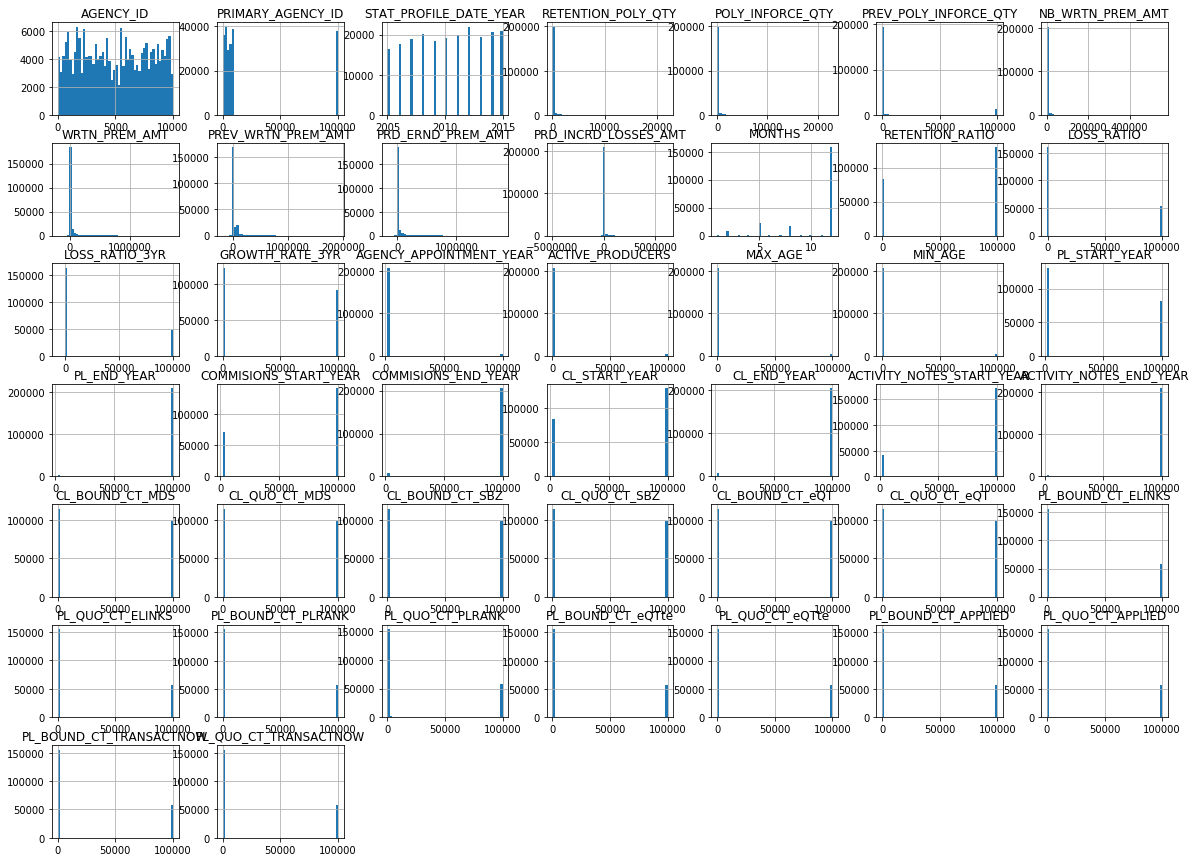

In [58]:
# Select only the numeric variables
numeric_vars = data.select_dtypes(include=['float64', 'int64'])

# Plot the histograms
numeric_vars.hist(bins=50, figsize=(20,15))
plt.show()

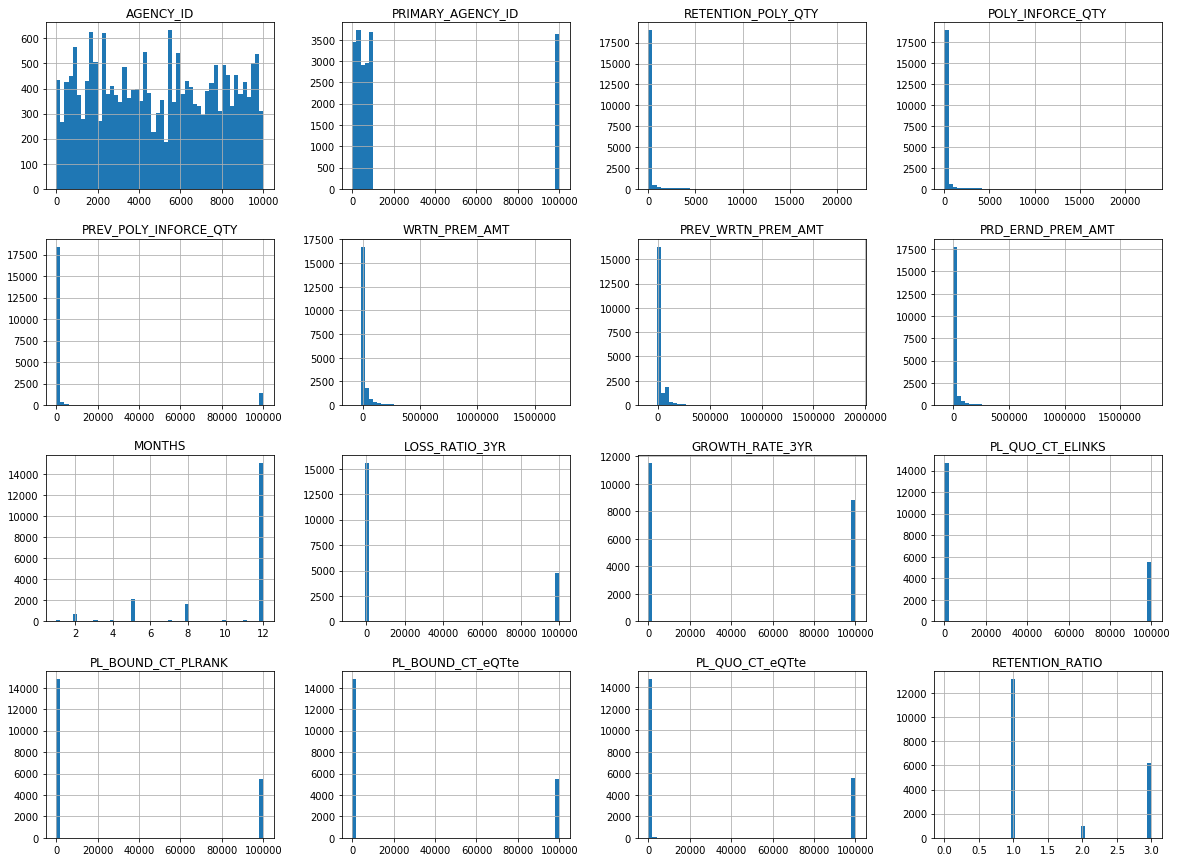

In [59]:
# Select only the numeric variables
numeric_vars = df_new.select_dtypes(include=['float64', 'int64'])

# Plot the histograms
numeric_vars.hist(bins=50, figsize=(20,15))
plt.show()

In [60]:
from scipy import stats
from pprint import pprint

# Select only the numeric variables
numeric_vars = data.select_dtypes(include=['float64', 'int64'])
alpha = 0.05
di={}
# Run the Anderson-Darling test for each variable
for var in numeric_vars.columns:
    result = stats.anderson(numeric_vars[var], dist='norm')
    print(f"{var}: Test Statistic: {result.statistic}, p-value: {result.critical_values}")
    if result.statistic < result.critical_values[0]:
        di[var]="normal distribution"
        #print(f"{var} follows a normal distribution (fail to reject H0)")
    elif result.statistic < result.critical_values[1]:
        di[var]="normal distribution"
        #print(f"{var} may follow a normal distribution (fail to reject H0)")
    elif result.statistic < result.critical_values[2]:
        di[var]="skewed distribution"
        #print(f"{var} has a skewed distribution (reject H0)")
    elif result.statistic < result.critical_values[3]:
        di[var]="very skewed distribution"
        #print(f"{var} has a very skewed distribution (reject H0)")
    else:
        di[var]="extreme skewed distribution"
        #print(f"{var} has a extreme skewed distribution (reject H0)")
print("**********************************************************************")
di

AGENCY_ID: Test Statistic: 2931.0292895025923, p-value: [0.576 0.656 0.787 0.918 1.092]
PRIMARY_AGENCY_ID: Test Statistic: 49180.67407241685, p-value: [0.576 0.656 0.787 0.918 1.092]
STAT_PROFILE_DATE_YEAR: Test Statistic: 3373.458759082103, p-value: [0.576 0.656 0.787 0.918 1.092]
RETENTION_POLY_QTY: Test Statistic: 61199.40542136622, p-value: [0.576 0.656 0.787 0.918 1.092]
POLY_INFORCE_QTY: Test Statistic: 60286.43456451368, p-value: [0.576 0.656 0.787 0.918 1.092]
PREV_POLY_INFORCE_QTY: Test Statistic: 73035.76487703878, p-value: [0.576 0.656 0.787 0.918 1.092]
NB_WRTN_PREM_AMT: Test Statistic: 57210.89399128652, p-value: [0.576 0.656 0.787 0.918 1.092]
WRTN_PREM_AMT: Test Statistic: 50543.31525712332, p-value: [0.576 0.656 0.787 0.918 1.092]
PREV_WRTN_PREM_AMT: Test Statistic: 40889.5130885698, p-value: [0.576 0.656 0.787 0.918 1.092]
PRD_ERND_PREM_AMT: Test Statistic: 50854.12973753788, p-value: [0.576 0.656 0.787 0.918 1.092]
PRD_INCRD_LOSSES_AMT: Test Statistic: 62515.936522832

{'AGENCY_ID': 'extreme skewed distribution',
 'PRIMARY_AGENCY_ID': 'extreme skewed distribution',
 'STAT_PROFILE_DATE_YEAR': 'extreme skewed distribution',
 'RETENTION_POLY_QTY': 'extreme skewed distribution',
 'POLY_INFORCE_QTY': 'extreme skewed distribution',
 'PREV_POLY_INFORCE_QTY': 'extreme skewed distribution',
 'NB_WRTN_PREM_AMT': 'extreme skewed distribution',
 'WRTN_PREM_AMT': 'extreme skewed distribution',
 'PREV_WRTN_PREM_AMT': 'extreme skewed distribution',
 'PRD_ERND_PREM_AMT': 'extreme skewed distribution',
 'PRD_INCRD_LOSSES_AMT': 'extreme skewed distribution',
 'MONTHS': 'extreme skewed distribution',
 'RETENTION_RATIO': 'extreme skewed distribution',
 'LOSS_RATIO': 'extreme skewed distribution',
 'LOSS_RATIO_3YR': 'extreme skewed distribution',
 'GROWTH_RATE_3YR': 'extreme skewed distribution',
 'AGENCY_APPOINTMENT_YEAR': 'extreme skewed distribution',
 'ACTIVE_PRODUCERS': 'extreme skewed distribution',
 'MAX_AGE': 'extreme skewed distribution',
 'MIN_AGE': 'extreme sk

Q4) Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

In [61]:
# P Value (features having p-value < 0.05 are signicant, rest can be removed)
# Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

dependent_var =df['RETENTION_RATIO']
independent_vars = X

# Fitting the OLS model
model = sm.OLS(dependent_var, independent_vars).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        RETENTION_RATIO   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              5957.
Date:                Sat, 04 Feb 2023   Prob (F-statistic):                        0.00
Time:                        20:12:51   Log-Likelihood:                         -15416.
No. Observations:               21333   AIC:                                  3.093e+04
Df Residuals:                   21285   BIC:                                  3.131e+04
Df Model:                          48                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
AGENCY_ID                  3.098e-06   1.19e-06      2.611      0.009    7.73e-07    5.42e-06
PRIMARY_AGENCY_ID         -1.536e-06   1.36e-07    -11.320      0.000    -1.8e-06   -1.27e-06
PROD_ABBR                     1.1616      0.010    118.658      0.000       1.142       1.181
PROD_LINE                    -0.2652      0.012    -22.748      0.000      -0.288      -0.242
STATE_ABBR                   -0.0475      0.027     -1.767      0.077      -0.100       0.005
STAT_PROFILE_DATE_YEAR        0.0073      0.001      7.762      0.000       0.005       0.009
RETENTION_POLY_QTY            0.0005   6.76e-05      7.951      0.000       0.000       0.001
POLY_INFORCE_QTY             -0.0003   6.17e-05     -4.626      0.000      -0.000      -0.000
PREV_POLY_INFORCE_QTY     -5.416e-06   4.31e-07    -12.569      0.000   -6.26e-06   -4.57e-06
NB_WRTN_PREM_AMT           9.115e-07   5.85e-07      1.558      0.119   -2.35e-07    2.06e-06
WRTN_PREM_AMT             -2.298e-06   6.77e-07     -3.392      0.001   -3.63e-06    -9.7e-07
PREV_WRTN_PREM_AMT         3.551e-07   4.04e-07      0.879      0.380   -4.37e-07    1.15e-06
PRD_ERND_PREM_AMT           4.42e-07   8.21e-07      0.538      0.590   -1.17e-06    2.05e-06
PRD_INCRD_LOSSES_AMT        9.22e-09   6.63e-08      0.139      0.889   -1.21e-07    1.39e-07
MONTHS                        0.0096      0.002      5.322      0.000       0.006       0.013
LOSS_RATIO                -5.316e-06   9.88e-08    -53.815      0.000   -5.51e-06   -5.12e-06
LOSS_RATIO_3YR             7.247e-07   1.33e-07      5.446      0.000    4.64e-07    9.85e-07
GROWTH_RATE_3YR            1.379e-07   9.36e-08      1.474      0.141   -4.55e-08    3.21e-07
AGENCY_APPOINTMENT_YEAR      -0.0013      0.000     -6.529      0.000      -0.002      -0.001
ACTIVE_PRODUCERS              0.0001      0.000      0.689      0.491      -0.000       0.000
MAX_AGE                       0.0009      0.000      2.798      0.005       0.000       0.001
MIN_AGE                       0.0003      0.000      0.918      0.359      -0.000       0.001
VENDOR_IND                   -7.2816      1.116     -6.526      0.000      -9.469      -5.094
VENDOR                        0.2065      0.058      3.530      0.000       0.092       0.321
PL_START_YEAR             -2.466e-06   4.47e-07     -5.517      0.000   -3.34e-06   -1.59e-06
PL_END_YEAR               -5.205e-07   2.76e-07     -1.884      0.060   -1.06e-06    2.11e-08
COMMISIONS_START_YEAR     -1.847e-07   1.04e-07     -1.776      0.076   -3.89e-07    1.92e-08
COMMISIONS_END_YEAR       -8.596e-08   2.07e-07     -0.415      0.678   -4.92e-07     3.2e-07
CL_START_YEAR              1.965e-08   1.03e-07      0.191      0.848 

In [62]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [63]:
import eli5 
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(classifier, random_state=1).fit(X_new, y_new)
eli5.show_weights(perm,top=None, feature_names = ['AGENCY_ID',
 'PROD_ABBR',
 'PROD_LINE',
 'STATE_ABBR',
 'RETENTION_POLY_QTY',
 'POLY_INFORCE_QTY',
 'PREV_POLY_INFORCE_QTY',
 'NB_WRTN_PREM_AMT',
 'WRTN_PREM_AMT',
 'PREV_WRTN_PREM_AMT',
 'PRD_ERND_PREM_AMT',
 'MONTHS',
 'LOSS_RATIO_3YR',
 'GROWTH_RATE_3YR',
 'ACTIVE_PRODUCERS',
 'VENDOR_IND',
 'VENDOR',
 'PL_QUO_CT_PLRANK',
 'PL_BOUND_CT_eQTte',
 'PL_BOUND_CT_APPLIED'])

C:\Users\dkpar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.2837 ± 0.0022,PL_BOUND_CT_eQTte
0.2827 ± 0.0044,POLY_INFORCE_QTY
0.2218 ± 0.0041,PL_BOUND_CT_APPLIED
0.1986 ± 0.0024,PL_QUO_CT_PLRANK
0.1961 ± 0.0020,VENDOR
0.1266 ± 0.0050,PREV_POLY_INFORCE_QTY
0.0792 ± 0.0045,WRTN_PREM_AMT
0.0755 ± 0.0027,PRD_ERND_PREM_AMT
0.0297 ± 0.0017,NB_WRTN_PREM_AMT
0.0258 ± 0.0027,PREV_WRTN_PREM_AMT


In [64]:
#Calculating Z Score
def calculate_z_scores(df):
    return (df - df.mean()) / df.std()

df = pd.DataFrame(data,columns=['AGENCY_ID',
 'RETENTION_POLY_QTY',
 'POLY_INFORCE_QTY',
 'PREV_POLY_INFORCE_QTY',
 'NB_WRTN_PREM_AMT',
 'WRTN_PREM_AMT',
 'PREV_WRTN_PREM_AMT',
 'PRD_ERND_PREM_AMT',
 'MONTHS',
 'LOSS_RATIO_3YR',
 'GROWTH_RATE_3YR',
 'ACTIVE_PRODUCERS',
 'PL_QUO_CT_PLRANK',
 'PL_BOUND_CT_eQTte',
 'PL_BOUND_CT_APPLIED'])
df = df.apply(pd.to_numeric)
z_scores = calculate_z_scores(df)
print(z_scores)

        AGENCY_ID  RETENTION_POLY_QTY  POLY_INFORCE_QTY  \
0       -1.699425           -0.220704         -0.226708   
1       -1.699425           -0.220704         -0.226708   
2       -1.699425           -0.220704         -0.226708   
3       -1.699425           -0.220704         -0.226708   
4       -1.699425           -0.220704         -0.226708   
...           ...                 ...               ...   
213323   1.714135           -0.166444         -0.176362   
213324   1.714135           -0.199835         -0.207344   
213325   1.714135           -0.220704         -0.215089   
213326   1.714135           -0.208182         -0.211216   
213327   1.714135           -0.213748         -0.220253   

        PREV_POLY_INFORCE_QTY  NB_WRTN_PREM_AMT  WRTN_PREM_AMT  \
0                   -0.271683         -0.220878      -0.249203   
1                   -0.271683         -0.209752      -0.196713   
2                   -0.271683         -0.220878      -0.202089   
3                   -0.2716

In [65]:
coef = dict(zip(independent_vars.columns, classifier.coef_[0]))
#pprint(f"Coefficients: {coef['Coefficients']}")
pprint(coef)

{'ACTIVE_PRODUCERS': -0.0067710847113082425,
 'AGENCY_APPOINTMENT_YEAR': 0.002352769935638266,
 'AGENCY_ID': -0.0006699979795484235,
 'GROWTH_RATE_3YR': 0.004546401729343248,
 'LOSS_RATIO': -0.0001942088774607088,
 'LOSS_RATIO_3YR': -0.00014579838086848293,
 'MONTHS': -0.00019723711692254476,
 'NB_WRTN_PREM_AMT': -0.0001174109564325129,
 'POLY_INFORCE_QTY': -0.0012671320247195268,
 'PRD_ERND_PREM_AMT': 9.295572046610449e-06,
 'PRD_INCRD_LOSSES_AMT': -1.1059524212143907e-05,
 'PREV_POLY_INFORCE_QTY': -8.91354667350452e-05,
 'PREV_WRTN_PREM_AMT': -0.0013187496231849443,
 'PRIMARY_AGENCY_ID': -1.1444347457961988e-05,
 'PROD_ABBR': -0.00017830257617101045,
 'PROD_LINE': -0.00019422109230030635,
 'RETENTION_POLY_QTY': -0.00039204596979625555,
 'STATE_ABBR': -0.00019423738020901894,
 'STAT_PROFILE_DATE_YEAR': -0.0003389228640262119,
 'WRTN_PREM_AMT': -0.00037736792710311133}


In [66]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20315 entries, 128037 to 64384
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AGENCY_ID              20315 non-null  int64  
 1   PRIMARY_AGENCY_ID      20315 non-null  int64  
 2   PROD_ABBR              20315 non-null  object 
 3   PROD_LINE              20315 non-null  object 
 4   STATE_ABBR             20315 non-null  object 
 5   RETENTION_POLY_QTY     20315 non-null  int64  
 6   POLY_INFORCE_QTY       20315 non-null  int64  
 7   PREV_POLY_INFORCE_QTY  20315 non-null  int64  
 8   WRTN_PREM_AMT          20315 non-null  float64
 9   PREV_WRTN_PREM_AMT     20315 non-null  float64
 10  PRD_ERND_PREM_AMT      20315 non-null  float64
 11  MONTHS                 20315 non-null  int64  
 12  LOSS_RATIO_3YR         20315 non-null  float64
 13  GROWTH_RATE_3YR        20315 non-null  float64
 14  VENDOR_IND             20315 non-null  object 
 1

Q5) Which independent variables have missing data? How much?

There are no missing values in the dataset.

Q6) Do the training and test sets have the same data? 

No, because we split the common dataset into train and test manually.

Q7) In the predictor variables independent of all the other predictor variables?

Yes, from the sns pairplot, we can see that the there is collinearity between features and that they are fairly independent of each other as most data points are categorical

In [67]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_new, y_new)

# Get the feature importances
importances = model.feature_importances_

# Sort the feature importances in descending order
sorted_idx = np.argsort(importances)[::-1]
li=X.iloc[:,cols].columns.tolist()
# Print the feature names and their importances
for i in sorted_idx:
    print(f"{li[i]}: {importances[i]}")

RETENTION_POLY_QTY: 0.8545439175611486
PROD_LINE: 0.13111849323452957
PREV_POLY_INFORCE_QTY: 0.0064370221543658575
PROD_ABBR: 0.005935916720839124
GROWTH_RATE_3YR: 0.001735851300566988
VENDOR_IND: 6.129096176514737e-05
STATE_ABBR: 2.719084270642487e-05
AGENCY_ID: 2.4871391594575766e-05
MONTHS: 1.8682466864862306e-05
POLY_INFORCE_QTY: 1.8217455186668518e-05
PRD_ERND_PREM_AMT: 1.5244718738663663e-05
PREV_WRTN_PREM_AMT: 1.5091860087872244e-05
LOSS_RATIO: 1.0165203970037044e-05
WRTN_PREM_AMT: 8.913211244827448e-06
PL_QUO_CT_eQTte: 8.90964765996952e-06
PL_BOUND_CT_eQTte: 7.802868343740099e-06
PL_QUO_CT_PLRANK: 6.013862456109123e-06
PRIMARY_AGENCY_ID: 2.873370976282293e-06
VENDOR: 2.1420635390244185e-06
LOSS_RATIO_3YR: 1.389103415705753e-06


Q8) Which predictor variables are the most important?

PL_BOUND_CT_eQTte,
POLY_INFORCE_QTY,
PL_BOUND_CT_APPLIED,
PL_QUO_CT_PLRANK,
VENDOR,
PREV_POLY_INFORCE_QTY,
WRTN_PREM_AMT,
PRD_ERND_PREM_AMT

Q9) Do the ranges of the predictor variables make sense?

The mean values vary greatly. However, it is clear that after using category encoders, data is widely dispersed.

Q10) What are the distributions of the predictor variables?   

After performing the Anderson Darling test and viewing the histograms, we can see see that most of the predictor variables have skewed distributions. Finally, by viewing the Q-Q plots, we can see that most of the data are not continuous.


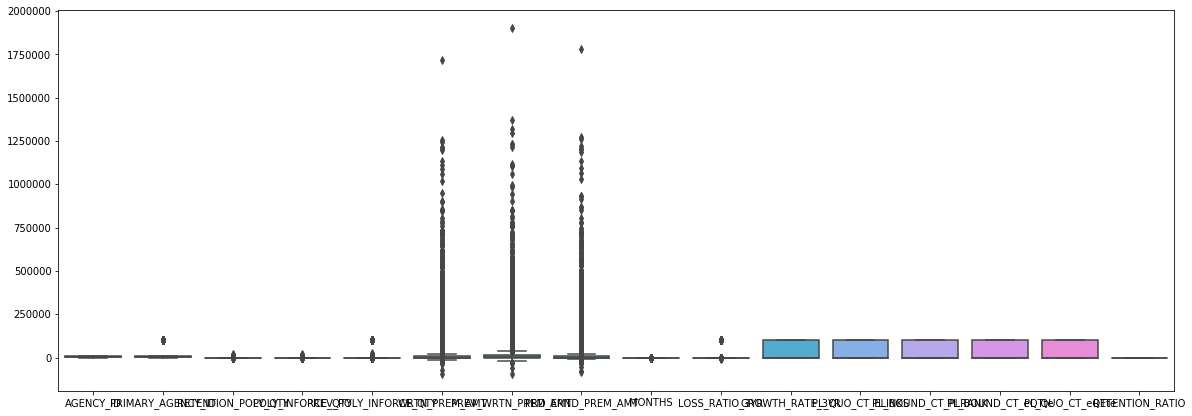

In [68]:
#Box Plot
import seaborn as sns
plt.figure(figsize=(20,7))
sns.boxplot(data=df_new)